In [1]:
import sys
from hulearn.classification import FunctionClassifier
from hulearn.experimental.interactive import InteractiveCharts
import pandas as pd
import numpy as np
import optuna
from functools import partial
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier, Perceptron
from TweetTextProcessor import TweetTextProcessor, DataFrameColumnExtracter
from sklearn.svm import SVC
from IPython.display import clear_output

In [2]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv("2Cleaned_Fake_News_Dataset.csv", index_col='index', sep=";").reset_index(drop=True)
X, y = df.drop('label', axis="columns"), df["label"]
np.set_printoptions(threshold=sys.maxsize)

In [3]:
tweet_data = ColumnTransformer([
    ("transform", TfidfVectorizer(), "tweet")
])

sentiment_data = ColumnTransformer([
    ("scaler", 'passthrough', ["polarity", "subjectivity"])
])

feature_union = FeatureUnion([
    ("tweet_data", tweet_data),
    # ("sentiment_data", sentiment_data)
])

train_x, valid_x, train_y, valid_y = train_test_split(
        X, y, test_size=(0.1), random_state=0
    )
print(train_x[0:1])

feature_union.fit(X)
train_x, valid_x = feature_union.transform(train_x), feature_union.transform(valid_x)


print(len(valid_x.toarray()[0][np.nonzero(valid_x.toarray()[0])]))
print(valid_x.toarray()[0][np.nonzero(valid_x.toarray()[0])])



model = SVC(probability=True).fit(train_x, train_y)

                                                                                   tweet  \
4135  Says this poem about people staying home was written by Kathleen O???Mara in 1869.   

      polarity  subjectivity  
4135       0.0           0.0  
45
[0.20799493 0.21967016 0.25522363 0.12781924 0.21037661 0.13511843
 0.26966739 0.14830618 0.21037661 0.16930821 0.21967016 0.16806895
 0.21037661 0.14780241 0.13850886 0.12544602 0.1463543  0.1311795
 0.06342575 0.08692515 0.12180567 0.08052455 0.12761181 0.10690071
 0.12086359 0.13241876 0.11423129 0.13000382 0.11951932 0.12295605
 0.15612046 0.12954993 0.11101283 0.1365977  0.06759966 0.13987767
 0.03993308 0.1190882  0.12601669 0.12025638 0.12329563 0.1236403
 0.14780241 0.08406662 0.16368983]
0.9401309635173059


In [4]:
clf = InteractiveCharts(df, labels="label")

Loading BokehJS ...

In [5]:
clf.add_chart(x="subjectivity", y="polarity")

In [6]:
model.predict_proba(valid_x[0])

array([[1.23044188e-05, 9.99987696e-01]])

In [7]:
print(df['tweet'].apply(lambda x: len(x.split(' '))).sum())

280702


<AxesSubplot:>

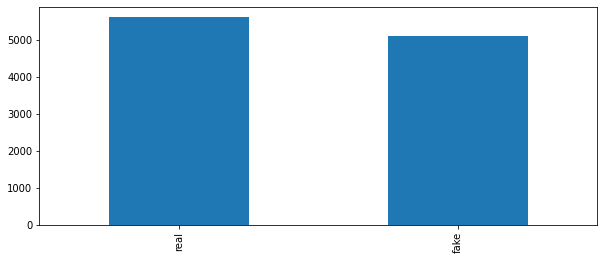

In [8]:
plt.figure(figsize=(10, 4))
df.label.value_counts().plot(kind='bar')

In [9]:
X_transformed = feature_union.fit_transform(X)

In [10]:
type(X_transformed)

scipy.sparse.csr.csr_matrix

In [11]:
X_transformed.toarray()[0][np.nonzero(X_transformed.toarray()[0])]

array([0.22264254, 0.30724705, 0.06870747, 0.08509637, 0.10273637,
       0.17059146, 0.15083287, 0.23186523, 0.17707489, 0.31282158,
       0.11262764, 0.19063109, 0.28502571, 0.30724705, 0.19929622,
       0.11916742, 0.10540001, 0.17014308, 0.24265206, 0.20672746,
       0.24265206, 0.202797  , 0.1479192 , 0.12207321, 0.20405436])

In [12]:
len(X_transformed.toarray()[0][np.nonzero(X_transformed.toarray()[0])]) - 2

23

In [13]:
length = []
for i in range(10689):
    length.append(len(X_transformed.toarray()[i][np.nonzero(X_transformed.toarray()[i])]))
    clear_output(wait=True)
    print("Status:", (i+1)/10689*100)

Status: 99.91587212563095


IndexError: index 10689 is out of bounds for axis 0 with size 10689

In [17]:
len(X_transformed.toarray()[10697][np.nonzero(X_transformed.toarray()[10697])]) - 2

IndexError: index 10697 is out of bounds for axis 0 with size 10689

In [18]:
predicted = model.predict(X_transformed)

In [19]:
transformed_df = pd.DataFrame({"length": length, "pred_label": predicted, "true_label": y})

In [19]:
transformed_df = pd.read_csv("lengths.csv", sep=";", index_col="index").reset_index(drop=True)

In [20]:
print(transformed_df["length"].where(transformed_df["length"] < 4)[transformed_df["length"].where(transformed_df["length"] < 4).notnull()])

1018    3.0
2687    3.0
3223    3.0
3596    2.0
4575    3.0
4848    3.0
5160    3.0
Name: length, dtype: float64


In [47]:
pd.set_option("display.max_rows", None)

In [22]:
print(X_transformed.toarray()[10614][np.nonzero(X_transformed.toarray()[10614])])

[0.18440268 0.23498739 0.11382319 0.20030112 0.07917184 0.09448656
 0.19480434 0.15443792 0.18062979 0.09792004 0.14887461 0.25639443
 0.18346574 0.25132223 0.17627034 0.10781805 0.19408742 0.09305784
 0.15103303 0.10817997 0.18008591 0.47290007 0.12409082 0.08988346
 0.05060687 0.15700987 0.25376069 0.24305294]


In [14]:
print(df[1860:1861])

                                                  tweet label  polarity  \
1860  Countries with more PCR testing have more deaths.  fake       0.5   

      subjectivity  
1860           0.5  


In [24]:
transformed_df.to_csv("lengths.csv", sep=";")

In [20]:
transformed_df.loc[transformed_df['length'] == 8]

,length,pred_label,true_label
25,8,fake,fake
52,8,fake,fake
57,8,fake,fake
139,8,fake,fake
185,8,real,real
...,...,...,...
10544,8,fake,fake
10599,8,fake,fake
10611,8,fake,fake
10650,8,fake,fake


In [45]:
transformed_df['pred_label'] != transformed_df['true_label']

0        False
1        False
2        False
3        False
4        False
         ...  
10684    False
10685    False
10686    False
10687    False
10688    False
Length: 10689, dtype: bool

In [35]:
false_predictions_df = transformed_df[transformed_df['pred_label'] != transformed_df['true_label']]

In [77]:
transformed_df['length'].value_counts()

13     418
11     417
15     402
12     395
14     385
10     361
16     361
28     346
19     335
20     333
31     328
30     324
18     323
32     313
34     312
29     307
33     300
22     297
17     295
27     294
23     291
24     290
9      290
25     281
35     275
21     274
36     262
8      251
26     249
37     217
7      190
38     190
39     150
6      129
40     108
41      72
5       65
42      55
43      45
44      28
4       25
45      16
46      14
47      11
48       8
49       7
3        6
52       5
69       4
53       4
51       2
76       2
59       2
61       2
54       2
56       2
50       2
58       1
83       1
143      1
229      1
70       1
77       1
90       1
213      1
87       1
2        1
68       1
62       1
89       1
63       1
436      1
650      1
55       1
Name: length, dtype: int64

In [83]:
false_predictions_df['length'].value_counts().divide(transformed_df['length'].value_counts()).dropna().sort_values(ascending=False)

9     0.027586
7     0.026316
14    0.023377
6     0.023256
12    0.020253
11    0.019185
42    0.018182
10    0.016620
8     0.015936
20    0.015015
41    0.013889
37    0.013825
21    0.010949
25    0.010676
24    0.010345
15    0.009950
28    0.008671
36    0.007634
35    0.007273
13    0.007177
23    0.006873
39    0.006667
18    0.006192
16    0.005540
38    0.005263
26    0.004016
27    0.003401
33    0.003333
30    0.003086
31    0.003049
19    0.002985
Name: length, dtype: float64

In [67]:
for unique_value in false_predictions_df['length'].unique().tolist():
    print(unique_value)

39
7
14
9
20
12
19
37
16
8
18
25
15
41
21
28
10
11
36
13
23
24
6
35
42
27
26
38
30
33
31


In [68]:
transformed_df['length']

0         25
1         13
2         13
3         24
4         36
5         38
6         30
7          7
8         16
9         17
10        22
11        29
12        26
13        25
14        20
15        33
16        34
17        37
18        24
19        35
20        37
21        29
22        25
23        39
24        18
25         8
26        15
27        23
28        34
29        16
30        20
31        16
32        30
33         9
34         9
35        18
36        24
37        10
38        15
39        14
40        32
41        20
42        31
43        31
44        14
45        13
46        16
47        35
48        33
49        25
50        26
51        26
52         8
53        17
54        16
55        10
56        22
57         8
58        33
59        10
60        20
61        15
62        12
63        31
64         6
65        14
66        31
67        16
68        37
69        11
70        19
71        13
72        37
73        19
74        16
75        22
76        32